# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [0]:
from data_science_utils.vision.keras import *

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


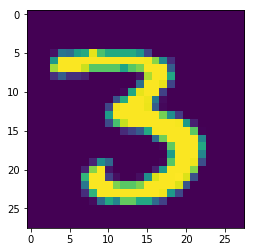

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[12])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
train_gen = datagen.flow(X_train, Y_train, batch_size=150,shuffle=False)
valid_gen = datagen.flow(X_test, Y_test, batch_size=100,shuffle=False)

# (X_train, y_train), (X_test, y_test)

In [25]:
from keras.layers import Activation, BatchNormalization, Dropout
from keras import regularizers
model = Sequential()

# After 1x1 BN added + mp rm1 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm1

model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm2

model.add(Convolution2D(20, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization()) # **
model.add(Dropout(0.1))

model.add(Convolution2D(10, 6, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization()) # *1
# model.add(Dropout(0.1)) # exp dropout
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 8)         136       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 8)         0         
__________

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.05)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
             metrics=['accuracy'])

In [13]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/model-0.001.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer]

In [28]:
# 0.001 shuffle = false,lr = 0.05
epochs = 40
model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=400, 
                    validation_steps=100, validation_data=valid_gen,callbacks=callbacks)

Epoch 1/40
400/400 [==============================] - 11s 26ms/step - loss: 0.7013 - acc: 0.8651 - val_loss: 0.5179 - val_acc: 0.8904

Epoch 00001: val_acc improved from -inf to 0.89040, saving model to /content/drive/My Drive/model-0.001.h5
Epoch 2/40
400/400 [==============================] - 8s 19ms/step - loss: 0.3288 - acc: 0.9515 - val_loss: 0.3502 - val_acc: 0.9347

Epoch 00002: val_acc improved from 0.89040 to 0.93470, saving model to /content/drive/My Drive/model-0.001.h5
Epoch 3/40
400/400 [==============================] - 8s 19ms/step - loss: 0.2602 - acc: 0.9612 - val_loss: 0.2585 - val_acc: 0.9587

Epoch 00003: val_acc improved from 0.93470 to 0.95870, saving model to /content/drive/My Drive/model-0.001.h5
Epoch 4/40
400/400 [==============================] - 8s 19ms/step - loss: 0.2235 - acc: 0.9665 - val_loss: 0.2204 - val_acc: 0.9658

Epoch 00004: val_acc improved from 0.95870 to 0.96580, saving model to /content/drive/My Drive/model-0.001.h5
Epoch 5/40
400/400 [======

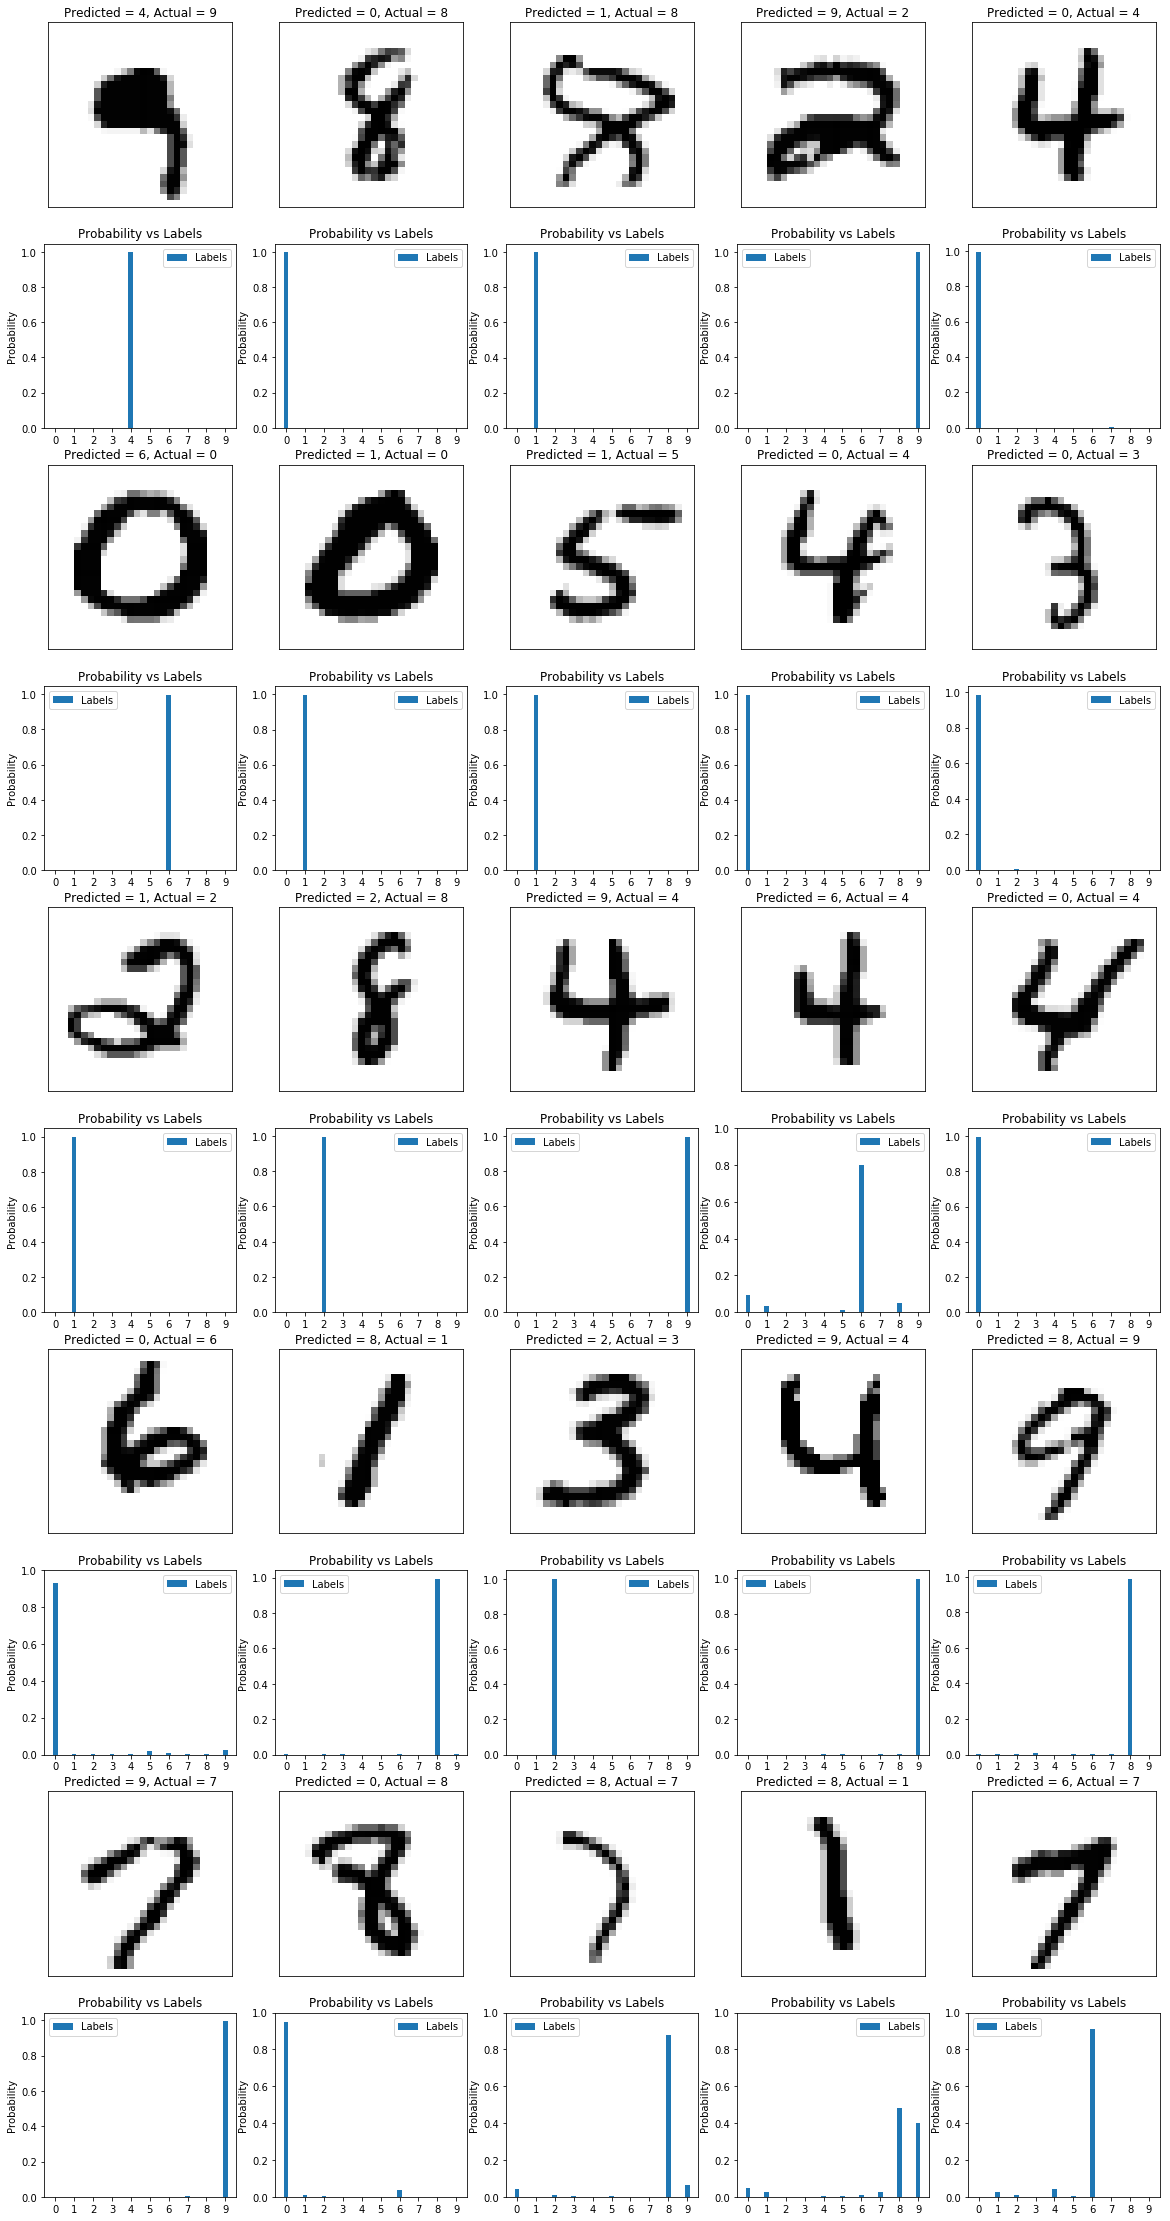

In [22]:
predictions = model.predict_generator(valid_gen,steps=100)
show_misclassified(X_test, Y_test, predictions[:len(Y_test)], classes=get_mnist_labels(), 
                       columns=5, total=25, 
                       pick_randomly=True)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

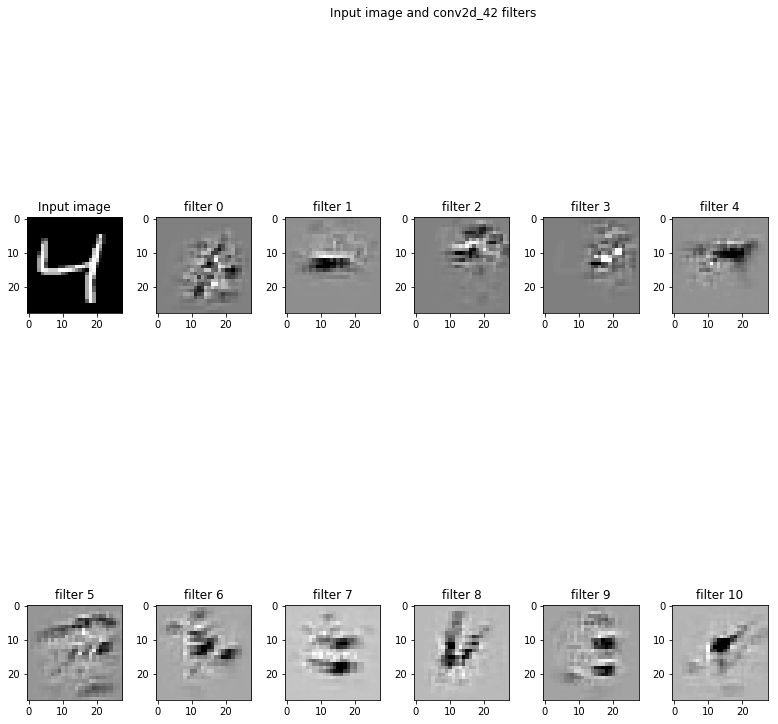

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_42'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()